# **SPAM DETECTION**

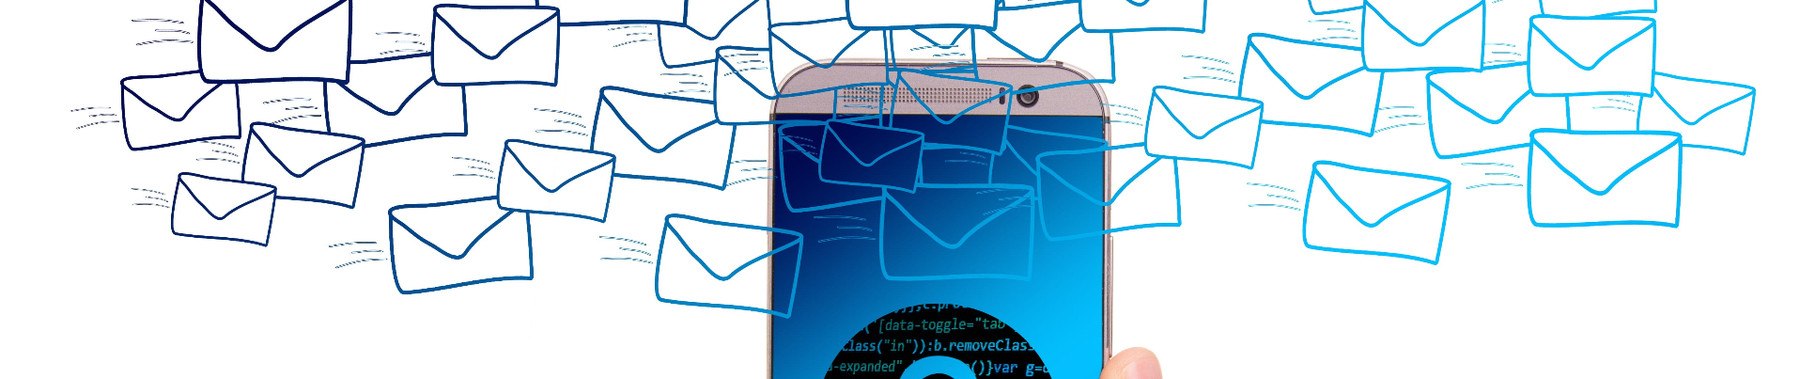




1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning






In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
df = pd.read_csv('/content/spam.csv' , encoding = 'latin-1')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
df1 = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

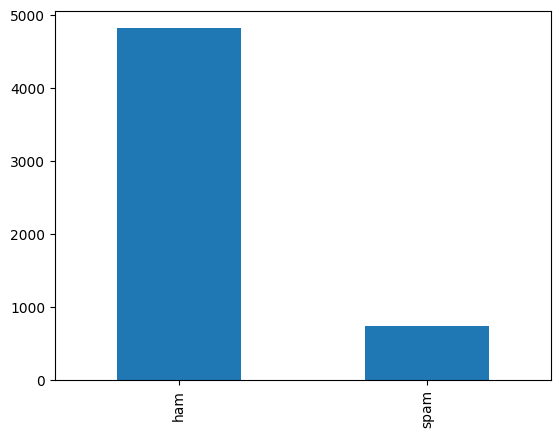

In [53]:
df1['v1'].value_counts().plot(kind ='bar')

In [54]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [55]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [56]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
df1['v2'] = df1['v2'].map(lambda s:preprocess(s))

In [58]:
df1['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [59]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

# **VECTORIZE THE TEXT**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [61]:
x = vect.fit_transform(df1['v2'])


In [62]:
x.shape

(5572, 7386)

In [63]:
type(x)

scipy.sparse._csr.csr_matrix

In [64]:
le = LabelEncoder()

In [65]:
y = le.fit_transform(df1['v1'])

# **SPLIT THE DATA INTO TRAIN AND TEST**

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [70]:
rf = RandomForestClassifier()

In [71]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose =2 , random_state=0)

In [72]:
search = clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   3.5s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   4.8s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   3.1s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   3.1s
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   3.1s
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   2.8s
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   2.7s
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [73]:
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 110,
 'criterion': 'gini'}

In [74]:
search.best_score_

0.9768879628371406

# **APPLICATION OF NB CLASSIFIER**

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
nb = MultinomialNB()

In [77]:
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train Accuracy score of the model is:  0.98
Test Accuracy score of the model is:  0.97


# **ADABOOST IMPLEMENTATION**

In [78]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [79]:
ada = AdaBoostClassifier()

In [80]:
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train Accuracy score of the model is:  0.98
Test Accuracy score of the model is:  0.97


# **RANDOM FOREST IMPLEMENTATION**

In [100]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [102]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 1.0
[[3843    0]
 [   0  614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3843
           1       1.00      1.00      1.00       614

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

The Accuracy of the model is: 0.98
[[982   0]
 [ 25 108]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.81      0.90       133

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



# **TRANSFER LEARNING - HUGGING FACE**

In [103]:
!pip install transformers

In [104]:
from transformers import pipeline

In [105]:
pipe=pipeline("text-classification", model="zhuolisam/spam-classifier")

In [106]:
preds=pipe(str(df1['v2'][2]))

In [107]:
print(preds)

[{'label': 'SPAM', 'score': 0.9983672499656677}]


# **DEPLOYMENT USING GRADIO**

In [108]:
!pip install gradio

In [109]:
import gradio as gr

In [110]:
def transform(input_text):
  transformed_input=preprocess(input_text)
  vectorized=vect.transform([transformed_input])
  result=rf.predict_proba(vectorized)[0]
  return {"ham" :float(result[0]),"spam" : float(result[1])}

demo = gr.Interface(
    fn =transform,
    inputs =gr.Textbox(),
    outputs='label',
)
demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2cf5d84fe822114868.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
